In [1]:
import e2e_process
# from kie_gcn import InvoiceGCN
from PIL import Image
from IPython.display import display
import cv2
from orientation_checking import OrientationChecker
from PIL import Image
from IPython.display import display
import time

INFO 2022-10-28 14:27:08,563 utils.py:147] Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [2]:
orientationChecker = OrientationChecker( model_path= "./weights/orientation/invoice_rotation_220920.pth")
e2e_OCR_Engine = e2e_process.E2E_OCR_Engine(
    detection_model_path="./PaddleOCR/pretrained_models/exported_det_model_221025",
    text_recognition_model_path="./weights/ocr/ocr_221026.pth",
    gcn_model_path="./weights/./gcn/GCN_221027_best_state_dict.pth"
)

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


extracted_line time: 0.17276501655578613
ocr_line time: 1.6641311645507812
make graph:  0.8716597557067871
transform:  3.0019094944000244
removing ./temp_data/temp_gcn/csv/99e118bb-6ceb-4d5f-b67b-f1b6ba3e280d.xlsx
removing ./temp_data/temp_gcn/img/99e118bb-6ceb-4d5f-b67b-f1b6ba3e280d.jpg


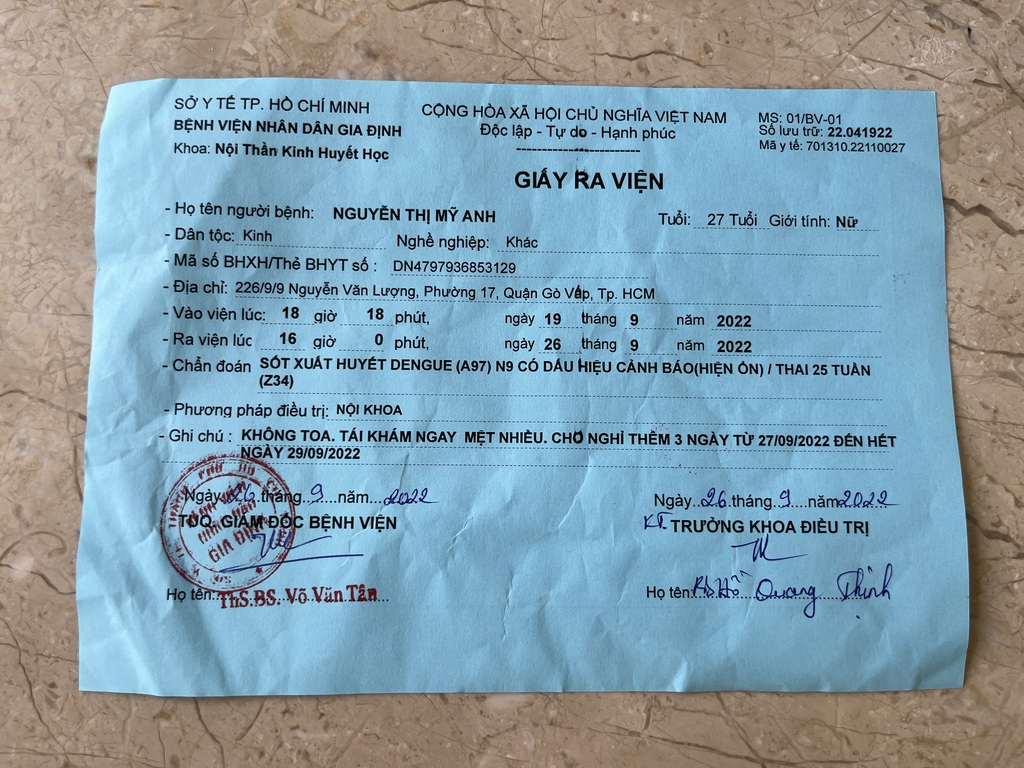

Total time: 10.980610609054565


In [3]:
start = time.time()
img_path = "D:/PPYData/discharge_paper/11102022/74.jpeg"
image = cv2.imread(img_path)
rotated_img, pred_class = orientationChecker(image)
result, extracted_df = e2e_OCR_Engine(rotated_img)
# print(pred_class, time.time() - start)
display(Image.fromarray(cv2.cvtColor(rotated_img, cv2.COLOR_RGB2BGR)))
print("Total time:", time.time() - start)
# torch.cuda.empty_cache()

In [4]:
result

{'hospital_name': 'BỆNH VIỆN NHÂN DÂN GIA ĐỊNH',
 'patient_name': 'NGUYỄN THỊ MỸ ANH',
 'age': '27',
 'gender': 'Nữ',
 'admissiion_date': [],
 'discharge_date': [],
 'sign_date': ['29/09/2022'],
 'icd-10': []}

In [5]:
extracted_df

,index,xmin,ymin,xmax,ymax,Object,pred_label,confidence_score,polygon
0,0,176,103,373,125,SỞ Y TẾ TP. HỒ CHÍ MINH,None,0.946500,"[(176, 103), (373, 106), (372, 126), (176, 123)]"
1,1,176,125,404,148,BỆNH VIỆN NHÂN DÂN GIA ĐỊNH,hospital_name,0.989032,"[(176, 125), (404, 129), (404, 149), (176, 145)]"
2,2,423,107,729,132,CỘNG HỒA XÃ HỘI CHỦ NGHĨA VIỆT NAM,None,0.996839,"[(423, 107), (729, 112), (728, 133), (423, 128)]"
3,3,760,113,845,128,MS: 01/BV-01,None,0.996253,"[(760, 113), (845, 113), (845, 129), (760, 129)]"
4,4,762,124,895,140,Số lưu trữ: 22.041922,None,0.964179,"[(762, 124), (895, 124), (895, 141), (762, 141)]"
5,5,482,129,679,145,Độc lập - Tự do - Hạnh phúc,None,0.989634,"[(482, 129), (679, 129), (679, 146), (482, 146)]"
6,6,761,140,906,155,Mã y tế: 701310.22110027,None,0.986323,"[(761, 140), (906, 140), (906, 156), (761, 156)]"
7,7,176,149,393,172,Khoa: Nội Thần Kinh Huyết Học,department,0.998123,"[(176, 149), (393, 154), (393, 173), (176, 168)]"
8,8,518,173,666,196,GIẤY RA VIỆN,document_type,0.990160,"[(518, 173), (666, 173), (666, 197), (518, 197)]"
9,9,169,211,324,231,- Họ tên người bệnh:,None,0.998236,"[(170, 211), (324, 214), (324, 232), (169, 229)]"


In [18]:
import postprocess
import importlib
import pandas as pd
importlib.reload(postprocess)
x = postprocess.KiePostProcess()

In [19]:
gender_text = "Giới tính: Nam"

In [20]:
x.gender_regularization(gender_text)

('Nam', None)